# Dual Mesh Construction

In [28]:
import uxarray as ux
import warnings

warnings.filterwarnings("ignore")

plot_kwargs = {
    "backend": "matplotlib",
    "aspect": 2,
    "fig_size": 400,
}

In [29]:
file = "../../test/meshfiles/mpas/QU/mesh.QU.1920km.151026.nc"

uxds = ux.open_dataset(file, file)

## Grids

The dual mesh of a grid is where the face centers of all primal (original) grid become the nodes of the dual mesh, and the nodes of the primal mesh become the face centers of the primal mesh. Using UXarray we can construct this dual mesh, using `grid.compute_dual()`. `compute_dual()` takes on argument, `method`. Currently only global dual meshes are supported, local dual meshes are planned for a later date. `compute_dual()` returns a new grid object.

In [30]:
grid = uxds.uxgrid

In [31]:
dual = grid.get_dual()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .Path.I  :Path   [x,y]
   .Path.II :Path   [x,y]
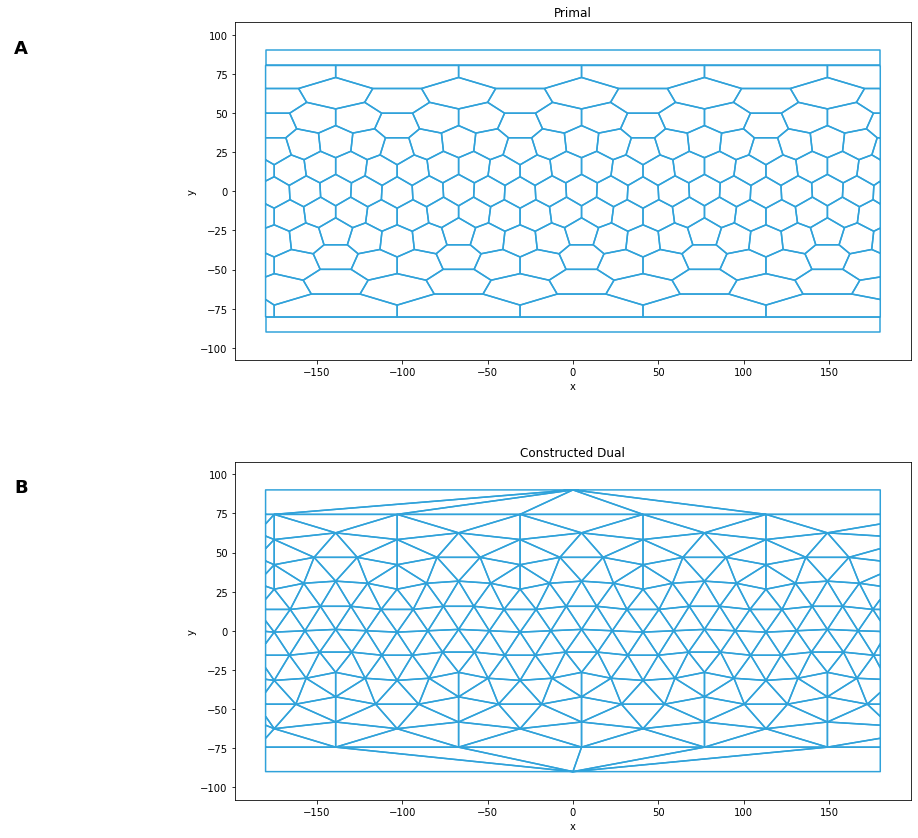

In [32]:
(
    grid.plot(title="Primal", backend="matplotlib", aspect=2)
    + dual.plot(title="Constructed Dual", backend="matplotlib", aspect=2)
).opts(fig_size=350).cols(1)

## UxDataArrays

We can also take a dual mesh of UxDataArrays. The concept for constructing the grid remains the same, and the grid constructed will be identical. The difference is the data stored inside the UxDataArray will be transfered with the dual mesh. The key differences is the location that the data is stored. The data transfer process works as follows:

* Face centered data becomes node centered, as each face becomes a node in the dual mesh.
* Node centered data becomes face centered, as each node becomes a face in the dual mesh.
* Edge centered data remains unchanged, as the edge centers will remain in the same place, despite the edges themselves being different.

### Face Centered

Constructing the dual mesh from a face centered variable, the data becomes node centered. We can then plot this using `topological_mean` to get the dual data to the faces for proper visualization comparisions.

In [33]:
uxds_dual_face = uxds["latCell"].get_dual()

In [36]:
(
    uxds["latCell"].plot.rasterize(
        backend="matplotlib", title="Face centered data on Primal Mesh", cmap=ux.cmaps.sequential_blue
    )
    + uxds_dual_face.topological_mean(destination="face").plot.rasterize(
        backend="matplotlib", title="Node Centered Data on Dual Mesh", cmap=ux.cmaps.sequential_blue
    )
).opts(fig_size=350).cols(1)

AttributeError: module 'uxarray' has no attribute 'cmaps'

### Node Centered Data

Constructing the dual mesh from a node centered variable, the data becomes face centered. This time the primal mesh will be the one using the topological mean, as for visualization the data needs to be stored on the face centers.

In [16]:
uxds_dual_node = uxds["xVertex"].get_dual()

:Layout
   .Image.I  :Image   [x,y]   (x_y xVertex)
   .Image.II :Image   [x,y]   (x_y xVertex)
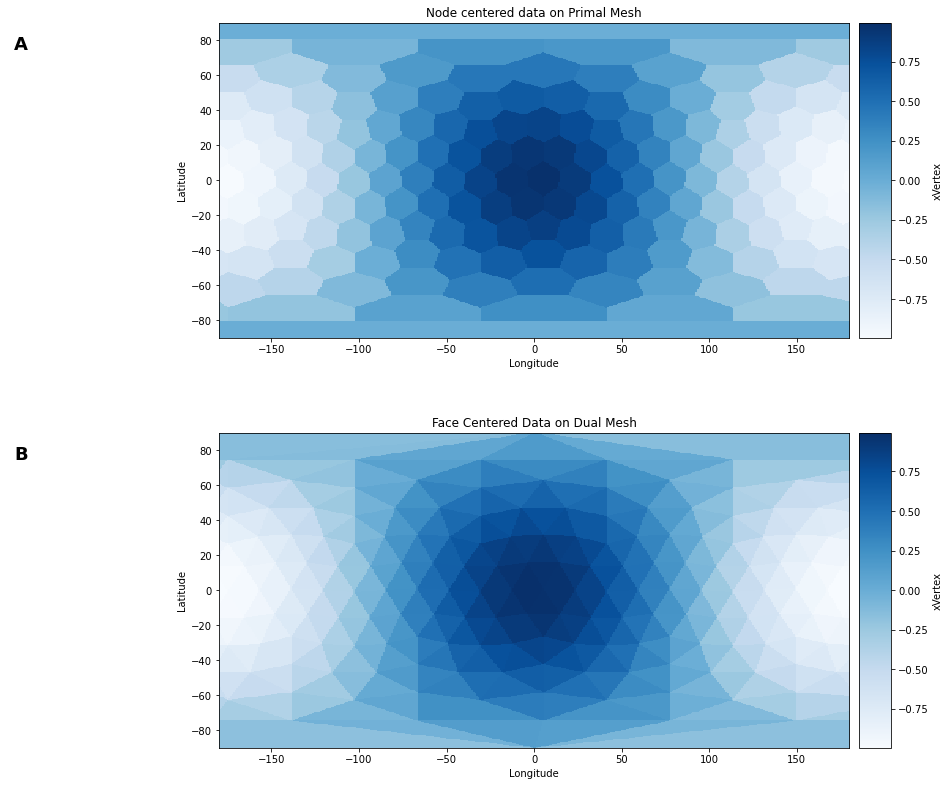

In [18]:
(
    uxds["xVertex"]
    .topological_mean(destination="face")
    .plot.rasterize(backend="matplotlib", title="Node centered data on Primal Mesh", cmap=ux.cmaps.sequential_blue)
    + uxds_dual_node.plot.rasterize(
        backend="matplotlib", title="Face Centered Data on Dual Mesh", cmap=ux.cmaps.sequential_blue
    )
).opts(fig_size=350).cols(1)

### Edge Centered Data

Constructing the dual mesh from a edge centered variable, the data stays on the same edge centers. However, a plotting example cannot be shown, as the `topological_mean` needed to visualize edge centered data is not currently implemented for edge centered data.

## UxDatasets

We can also construct a dual mesh from an entire dataset, which will convert the entire UxDataset to its dual mesh form. Below we can see the dataset before the dual mesh is constructed.

In [24]:
uxds

<xarray.UxDataset> Size: 176kB
Dimensions:               (n_face: 162, n_edge: 480, n_node: 320,
                           n_max_face_nodes: 6, maxEdges2: 12, TWO: 2,
                           vertexDegree: 3)
Dimensions without coordinates: n_face, n_edge, n_node, n_max_face_nodes,
                                maxEdges2, TWO, vertexDegree
Data variables: (12/42)
    latCell               (n_face) float64 1kB 0.4636 0.4636 ... -0.8188 -0.8188
    lonCell               (n_face) float64 1kB 3.23 4.486 0.0 ... 3.009 3.45
    xCell                 (n_face) float64 1kB -0.891 -0.2005 ... -0.6508
    yCell                 (n_face) float64 1kB -0.07869 -0.8717 ... -0.2075
    zCell                 (n_face) float64 1kB 0.4472 0.4472 ... -0.7303 -0.7303
    indexToCellID         (n_face) int32 648B 1 2 3 4 5 ... 158 159 160 161 162
    ...                    ...
    cellQuality           (n_face) float64 1kB 1.0 1.0 1.0 ... 0.8565 0.8565
    gridSpacing           (n_face) float64 1kB 0.2728 0.2728 ... 0.3051 0.3051
    triangleQuality       (n_node) float64 3kB 0.8577 0.8577 0.8577 ... 1.0 1.0
    triangleAngleQuality  (n_node) float64 3kB 0.8315 0.8315 0.7619 ... 1.0 1.0
    obtuseTriangle        (n_node) int32 1kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    meshDensity           (n_face) float64 1kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0

Now we can construct the dual and see the new dataset that is returned.

In [37]:
uxds_dual = uxds.get_dual()

In [38]:
uxds_dual

<xarray.UxDataset> Size: 176kB
Dimensions:               (n_node: 162, n_edge: 480, n_face: 320,
                           n_max_face_nodes: 6, maxEdges2: 12, TWO: 2,
                           vertexDegree: 3)
Dimensions without coordinates: n_node, n_edge, n_face, n_max_face_nodes,
                                maxEdges2, TWO, vertexDegree
Data variables: (12/42)
    latCell               (n_node) float64 1kB 0.4636 0.4636 ... -0.8188 -0.8188
    lonCell               (n_node) float64 1kB 3.23 4.486 0.0 ... 3.009 3.45
    xCell                 (n_node) float64 1kB -0.891 -0.2005 ... -0.6508
    yCell                 (n_node) float64 1kB -0.07869 -0.8717 ... -0.2075
    zCell                 (n_node) float64 1kB 0.4472 0.4472 ... -0.7303 -0.7303
    indexToCellID         (n_node) int32 648B 1 2 3 4 5 ... 158 159 160 161 162
    ...                    ...
    cellQuality           (n_node) float64 1kB 1.0 1.0 1.0 ... 0.8565 0.8565
    gridSpacing           (n_node) float64 1kB 0.2728 0.2728 ... 0.3051 0.3051
    triangleQuality       (n_face) float64 3kB 0.8577 0.8577 0.8577 ... 1.0 1.0
    triangleAngleQuality  (n_face) float64 3kB 0.8315 0.8315 0.7619 ... 1.0 1.0
    obtuseTriangle        (n_face) int32 1kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    meshDensity           (n_node) float64 1kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0

As you can see, transforms the whole dataset. We can now take any variable and plot it, as shown below.

:Image   [x,y]   (x_y xVertex)
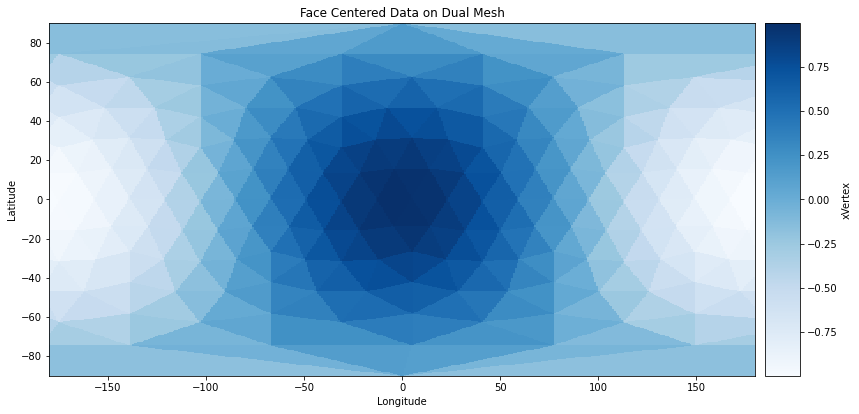

In [41]:
uxds_dual["xVertex"].plot.rasterize(backend="matplotlib", title="xVertex from UxDataset dual mesh",
                                    cmap=ux.cmaps.sequential_blue).opts(fig_size=350)